**Chapter 2 – End-to-end Machine Learning project**

*This notebook contains all the sample code and solutions to the exercises in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [41]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


This project requires Python 3.7 or above:

In [42]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [43]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

In [44]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/cars.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/cars.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as cars_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Take a Quick Look at the Data Structure

In [45]:
import pandas as pd

cars = pd.read_csv('cars.csv')

In [46]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [47]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


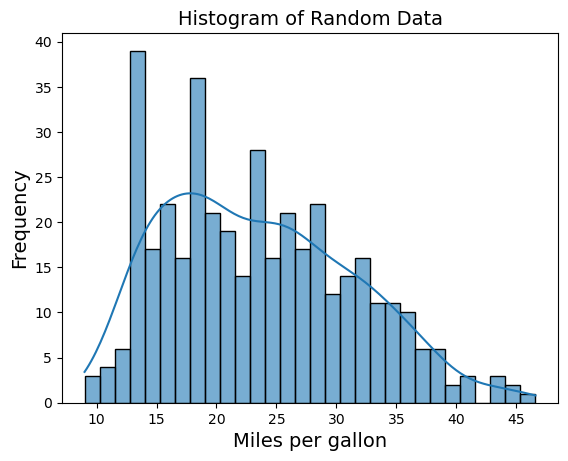

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt



# Generate a sample dataset (in this case, random data)
data = cars["mpg"]

# Create a histogram with Seaborn
sns.histplot(data, bins=30, kde=True, alpha=0.6)

# Add labels and title
plt.xlabel('Miles per gallon')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# Show the plot
plt.show()

In [49]:
#Update the car name column to only have maker name 
cars["car name"] = cars['car name'].str.split().str[0]
cars.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
5,15.0,8,429.0,198,4341,10.0,70,1,ford
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac
9,15.0,8,390.0,190,3850,8.5,70,1,amc


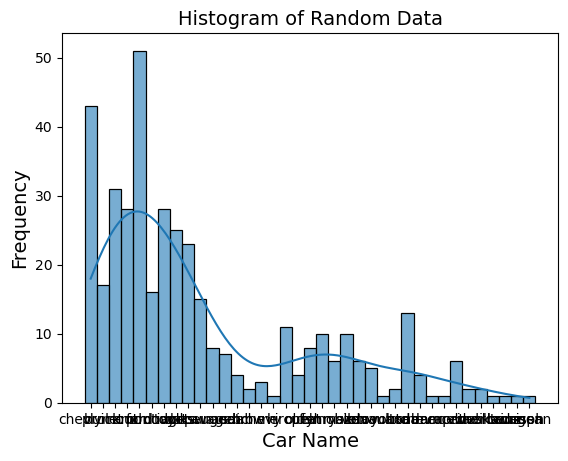

car name
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

In [50]:

# Generate a sample dataset (in this case, random data)
data = cars["car name"]

# Create a histogram with Seaborn
sns.histplot(data, bins=30, kde=True, alpha=0.6)

# Add labels and title
plt.xlabel('Car Name')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# Show the plot
plt.show()
cars["car name"].value_counts()


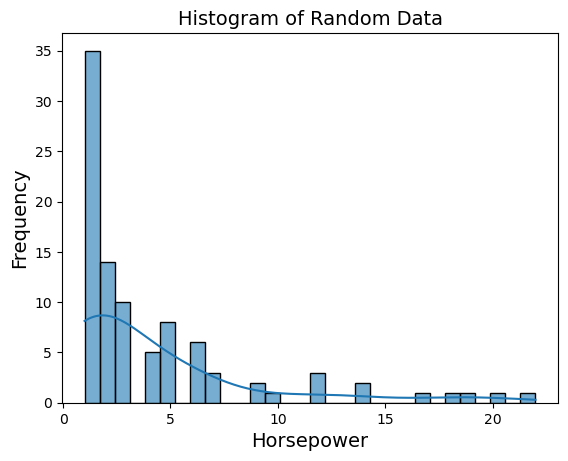

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a sample dataset (in this case, random data)
data = cars["horsepower"].value_counts()


# Create a histogram with Seaborn
sns.histplot(data, bins=30, kde=True, alpha=0.6)

# Add labels and title
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# Show the plot
plt.show()


In [52]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [53]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

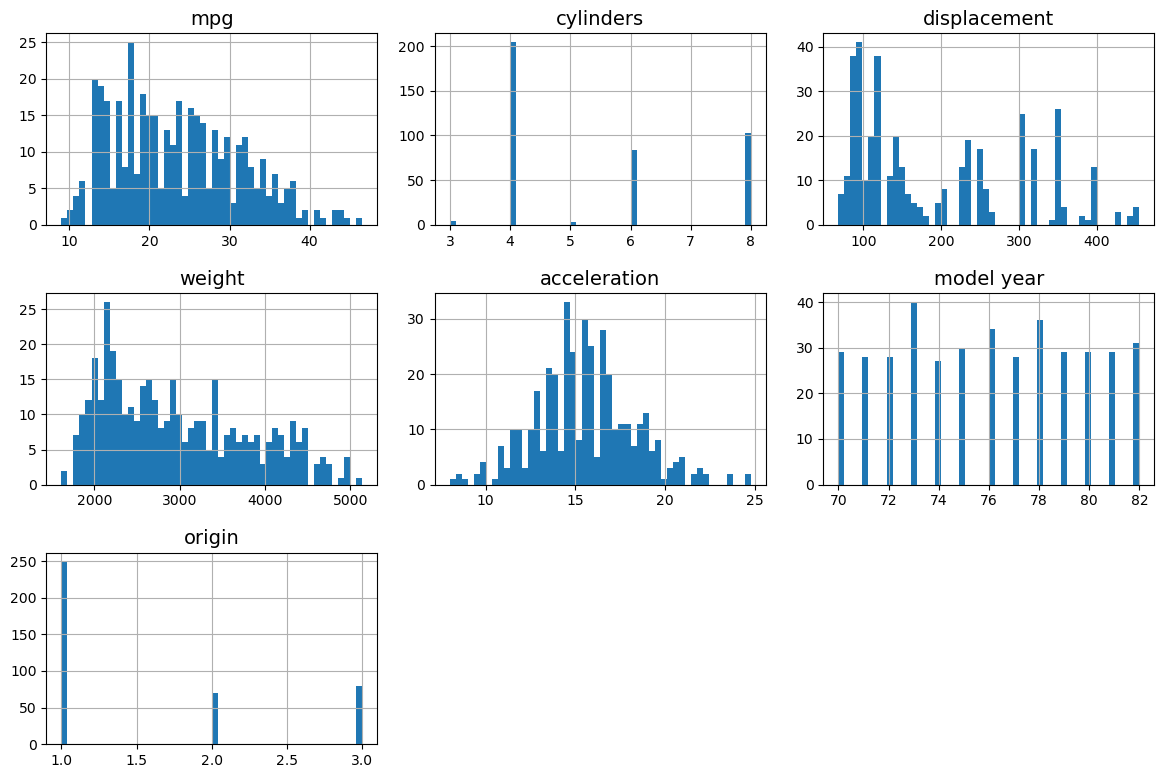

In [54]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cars.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [55]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [56]:
train_set, test_set = shuffle_and_split_data(cars, 0.2)
len(train_set)

319

In [57]:
len(test_set)

79

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [58]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

In [59]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [60]:
cars_with_id = cars.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(cars_with_id, 0.2, "index")

In [61]:
cars_with_id["id"] = cars["origin"] * 1000 + cars["model year"]
train_set, test_set = split_data_with_id_hash(cars_with_id, 0.2, "id")

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

In [63]:
test_set["horsepower"].isnull().sum()

#Lets also convert it into a integer value: 


np.int64(0)

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [64]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530930072


If you prefer simulations over maths, here's how you could get roughly the same result:

In [65]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

As a car expert, I'll take a closer look at the data and consider various factors before making an informed decision.

After reviewing the columns, I notice that `origin` seems like an interesting choice. However, upon further inspection, I realize that using `origin` as the categorical feature might not be the most effective approach for stratification. Here's why:

* **Origin is not a direct influence on performance**: The origin of a car doesn't necessarily dictate its performance or characteristics.
* **Model year and origin may be highly correlated**: Since many modern cars have their origins in the same countries, using `origin` as the categorical feature might lead to stratification based on model years rather than actual differences between car models.

Considering these points, I'd like to suggest an alternative approach:

**Let's use "model year" as the categorical feature for stratification!**

Here's why I think this is a better choice:

* **Model year directly affects performance**: The design, engineering, and technologies used in cars tend to improve over time. Using `model year` as the categorical feature allows us to capture these changes and potentially identify differences between older and newer car models.
* **Model year provides a more nuanced stratification**: By using `model year`, we can create a more granular categorization of our data, which might lead to better model performance and insights.

Here's the updated code:
```python
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_train_set_n, strat_test_set_n = splitter.split(cars, cars["model year"])
```
So, based on my expertise and analysis of the data, I recommend using `model year` as the categorical feature for stratification.

Lets t's use "model year" as the categorical feature for stratification!

To be shure we use the appropiate categories, lets try to count the number of cars per model year.

Lets count the number of cars in each model year:
cars["model year"].value_counts()



In [66]:
cars["model year"].value_counts()


model year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

Lets use the years as a categorical feature:


In [67]:
cars["model_year_category"] = pd.cut(cars["model year"], 
                                    bins=[70, 73, 75, 78, np.inf], 
                                    labels=['Pre-1973', '1973-1975', '1976-1978', '>1978'], 
                                    include_lowest=True)


TO DO: 

            1. generate proper bins for car model years baed on the data plot

            continue stratifieign

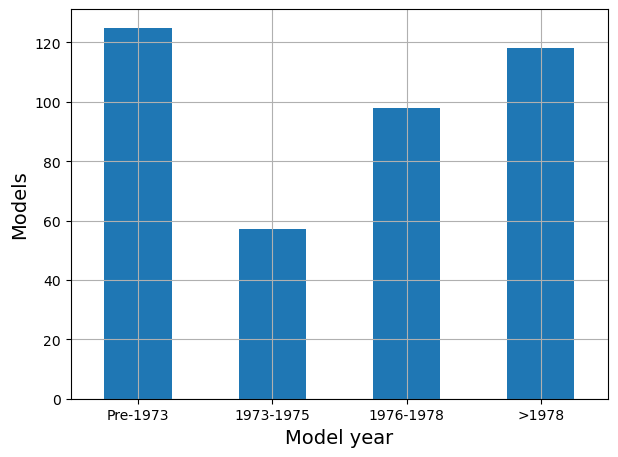

In [68]:
cars["model_year_category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Model year")
plt.ylabel("Models")
save_fig("model_year_cat_bar_plot")  # extra code
plt.show()

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cars, cars["model_year_category"]):
    strat_train_set_n = cars.iloc[train_index]
    strat_test_set_n = cars.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [70]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [71]:
strat_train_set, strat_test_set = train_test_split(
    cars, test_size=0.2, stratify=cars["model_year_category"], random_state=42)

Looking at the income proportions in test set:  

In [72]:
strat_test_set["model_year_category"].value_counts() / len(strat_test_set)

model_year_category
Pre-1973     0.3125
>1978        0.3000
1976-1978    0.2500
1973-1975    0.1375
Name: count, dtype: float64

With similar code you c a n m easure theincome category proportionsin thefull data.
set. Figure 2-10 comparesthe income category proportions in the overall dataset, in thetestsetgeneratedwithstratifiedsampling,andina testsetgeneratedusingpurely random sampling.As you c a n see, the test set generatedusingstratifiedsamplinghas
income category proportions almost identical to those in the full dataset, whereast h e testsetgeneratedusingpurelyrandomsamplingis skewed.

In [73]:
# extra code – computes the data for Figure 2–10

def model_year_category_proportions(data):
    return data["model_year_category"].value_counts() / len(data)

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": model_year_category_proportions(cars),
    "Stratified %": model_year_category_proportions(strat_test_set),
    "Random %": model_year_category_proportions(test_set),
}).sort_index()
compare_props.index.name = "Model Year Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Model Year Category,,,,,
Pre-1973,31.41,31.25,40.00,-0.50,27.36
1973-1975,14.32,13.75,15.00,-3.99,4.74
1976-1978,24.62,25.00,16.25,1.53,-34.01
>1978,29.65,30.00,28.75,1.19,-3.03


We see stratified is close to the whole dataset. Random is a bit further off.

We won't use the model_year_category column again, SO we might as well drop it, reverting the data back to its originalstate:

In [74]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("model_year_category", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [75]:
cars = strat_train_set.copy()

In [76]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
124,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile
118,24.0,4,116.0,75,2158,15.5,73,2,opel
123,20.0,6,156.0,122,2807,13.5,73,3,toyota
286,17.6,8,302.0,129,3725,13.4,79,1,ford
314,26.4,4,140.0,88,2870,18.1,80,1,ford


## Visualizing Geographical Data

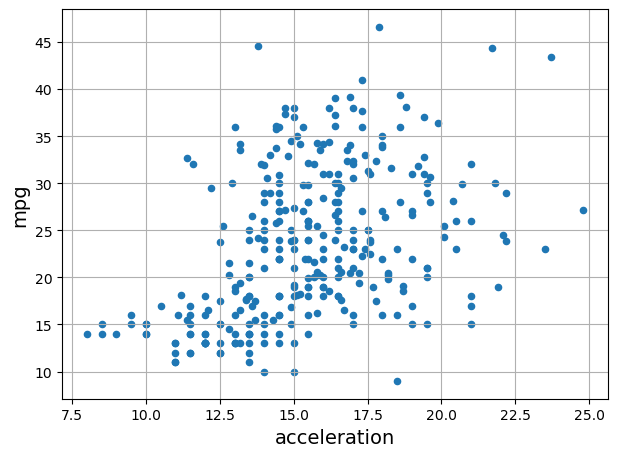

In [77]:
cars.plot(kind="scatter", x="acceleration", y="mpg", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

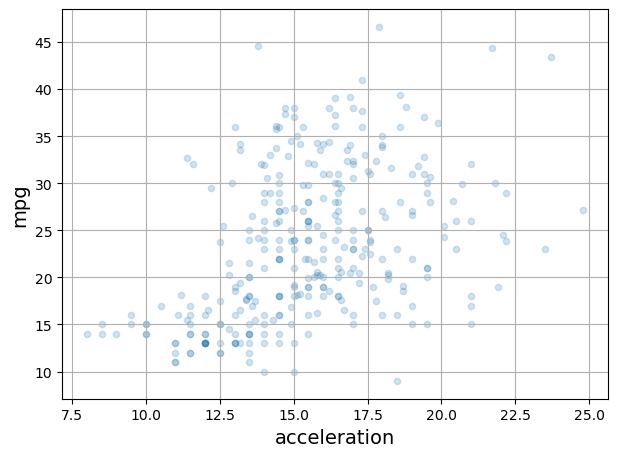

In [78]:
cars.plot(kind="scatter", x="acceleration", y="mpg", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

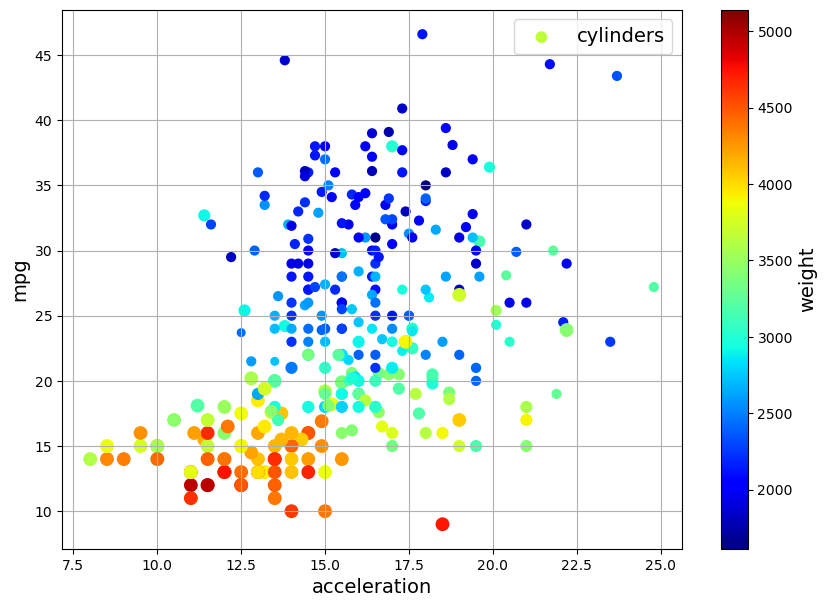

In [79]:
import matplotlib.pyplot as plt

# Increase dot size by changing s parameter value
cars.plot(kind="scatter", x="acceleration", y="mpg",
          grid=True, 
          s=1000 * cars["cylinders"] / 100,
          label="cylinders",
          c="weight", cmap="jet", colorbar=True,
          legend=True, sharex=False, figsize=(10, 7))

# Save the figure to a file
plt.savefig("wieght_scatterplot.png")

# Show the plot
plt.show()


The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

The next cell generates the first figure in the chapter (this code is not in the book). It's just a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [80]:
cars['horsepower'] = cars['horsepower'].astype(str)
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')


In [81]:
corr_matrix = cars.corr(numeric_only=True)

In [82]:
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model year      0.603311
origin          0.566370
acceleration    0.423132
horsepower     -0.784896
cylinders      -0.785212
displacement   -0.809224
weight         -0.837562
Name: mpg, dtype: float64

We see horsepower is not there and therefor we convert it it to a integrer

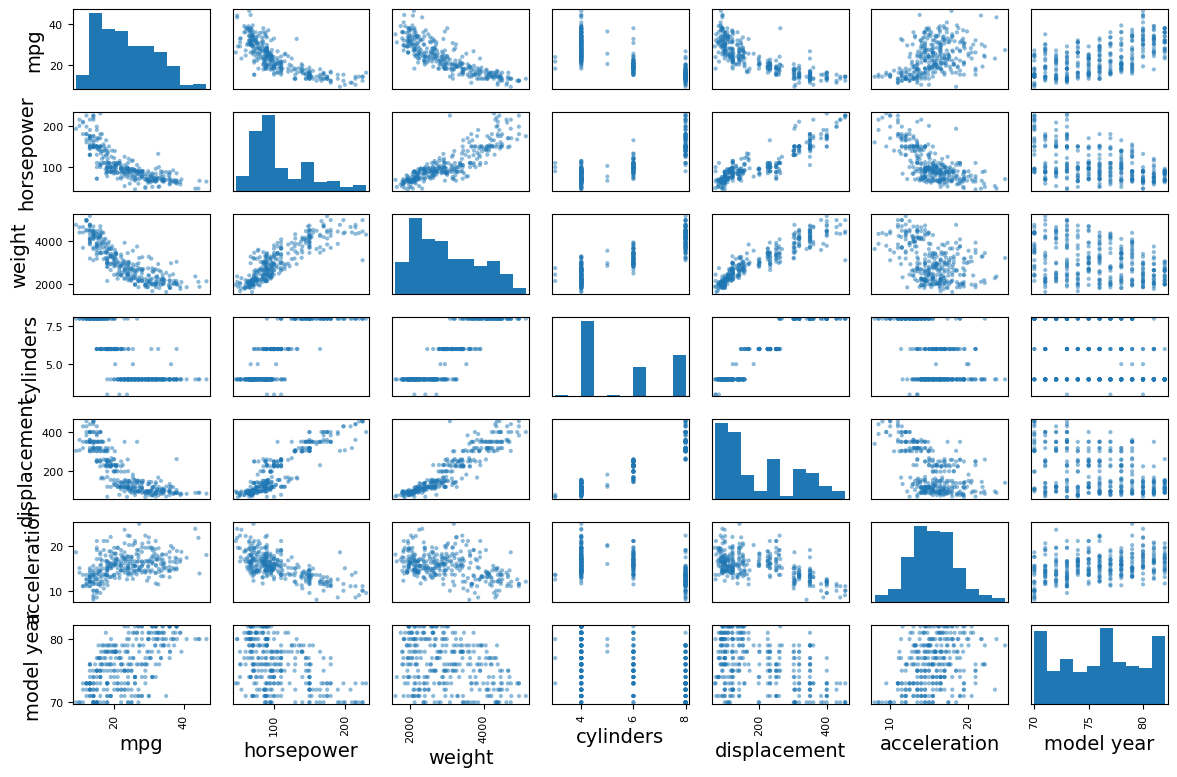

In [83]:
from pandas.plotting import scatter_matrix

attributes = ["mpg", "horsepower", "weight", "cylinders", "displacement", "acceleration", "model year"]
scatter_matrix(cars[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

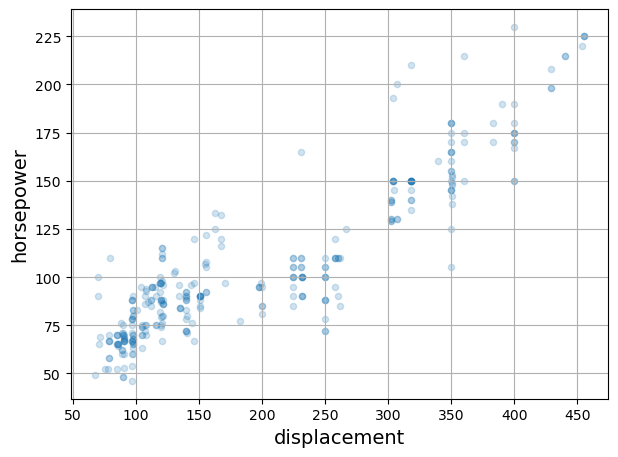

In [84]:
cars.plot(kind="scatter", x="displacement", y="horsepower",
             alpha=0.2, grid=True)
save_fig("displacement_vs_horsepower_value_scatterplot")  # extra code
plt.show()

## Experimenting with Attribute Combinations

Based on the given example, let's create some interesting car-related correlation experiments.

We'll start by exploring the `autompg` dataset from the `pytrends` library. This dataset contains information about various cars, including their MPG (miles per gallon), cylinders, displacement, horsepower, weight, and more.

```python
import pandas as pd

# Load the dataset
cars = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

# Calculate new features
cars["weight_per_cylinder"] = cars["weight"] / cars["cylinders"]
cars["displacement_per_cylinder"] = cars["displacement"] / cars["cylinders"]
cars["horsepower_per_cylinder"] = cars["horsepower"] / cars["cylinders"]
cars["mpg_per_cylinder"] = cars["mpg"] / cars["cylinders"]

cars["weight_per_displacement"] = cars["weight"] / cars["displacement"]
cars["horsepower_per_displacement"] = cars["horsepower"] / cars["displacement"]
cars["mpg_per_displacement"] = cars["mpg"] / cars["displacement"]

# Print the new features and their correlation with MPG
print(cars[["mpg", "weight_per_cylinder", "displacement_per_cylinder", "horsepower_per_cylinder", "mpg_per_cylinder",
            "weight_per_displacement", "horsepower_per_displacement", "mpg_per_displacement"]].corr()["mpg"])
```

This code will create new features based on the given dataset and print the correlation of these new features with MPG. Here's a breakdown of what each feature represents:

* `weight_per_cylinder`: Weight per cylinder of the engine, which could indicate how efficiently the engine is designed.
* `displacement_per_cylinder`: Displacement per cylinder of the engine, which could indicate how large each cylinder is.
* `horsepower_per_cylinder`: Horsepower per cylinder of the engine, which could indicate how powerful each cylinder is.
* `mpg_per_cylinder`: MPG per cylinder of the engine, which could indicate how efficient each cylinder is.
* `weight_per_displacement`: Weight per displacement of the engine, which could indicate how efficient the engine is in terms of weight.
* `horsepower_per_displacement`: Horsepower per displacement of the engine, which could indicate how powerful the engine is in terms of displacement.
* `mpg_per_displacement`: MPG per displacement of the engine, which could indicate how efficient the engine is in terms of displacement.

The correlation values will give us insights into how these features relate to MPG. For example, a high positive correlation between `mpg_per_cylinder` and MPG would suggest that cars with more efficient cylinders (in terms of MPG) tend to have better overall MPG.

Note that these are just examples, and there are many other features you could create and analyze depending on your specific interests and goals.

In [85]:
# Calculate new features
cars["weight_per_cylinder"] = cars["weight"] / cars["cylinders"]
cars["displacement_per_cylinder"] = cars["displacement"] / cars["cylinders"]
cars["horsepower_per_cylinder"] = cars["horsepower"] / cars["cylinders"]
cars["mpg_per_cylinder"] = cars["mpg"] / cars["cylinders"]

cars["weight_per_displacement"] = cars["weight"] / cars["displacement"]
cars["horsepower_per_displacement"] = cars["horsepower"] / cars["displacement"]
cars["mpg_per_displacement"] = cars["mpg"] / cars["displacement"]

# Print the new features and their correlation with MPG
print(cars[["mpg", "weight_per_cylinder", "displacement_per_cylinder", "horsepower_per_cylinder", "mpg_per_cylinder",
            "weight_per_displacement", "horsepower_per_displacement", "mpg_per_displacement"]].corr()["mpg"])


mpg                            1.000000
weight_per_cylinder           -0.007997
displacement_per_cylinder     -0.774127
horsepower_per_cylinder       -0.243885
mpg_per_cylinder               0.963053
weight_per_displacement        0.706548
horsepower_per_displacement    0.523183
mpg_per_displacement           0.931269
Name: mpg, dtype: float64


In [86]:
corr_matrix = cars.corr(numeric_only=True)
corr_matrix["mpg"].sort_values(ascending=False)

mpg                            1.000000
mpg_per_cylinder               0.963053
mpg_per_displacement           0.931269
weight_per_displacement        0.706548
model year                     0.603311
origin                         0.566370
horsepower_per_displacement    0.523183
acceleration                   0.423132
weight_per_cylinder           -0.007997
horsepower_per_cylinder       -0.243885
displacement_per_cylinder     -0.774127
horsepower                    -0.784896
cylinders                     -0.785212
displacement                  -0.809224
weight                        -0.837562
Name: mpg, dtype: float64

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [87]:
cars = strat_train_set.drop("mpg", axis=1)
cars_labels = strat_train_set["mpg"].copy()

## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

turn the horspoeer into float64 

In [88]:
cars['horsepower'] = cars['horsepower'].astype(str)
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')


In [89]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 124 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    315 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   car name      318 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 22.4+ KB


In [90]:
cars_option3 = cars.copy()

median = cars["horsepower"].median()
cars_option3["horsepower"].fillna(median, inplace=True)  # option 3



/var/folders/fd/0cmv4xlj3g39_rj20s0m475h0000gn/T/ipykernel_9562/2281263377.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_option3["horsepower"].fillna(median, inplace=True)  # option 3


In [91]:
cars_option3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 124 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    318 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   car name      318 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 22.4+ KB


In [92]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [93]:
cars_num = cars.select_dtypes(include=[np.number])

In [94]:
imputer.fit(cars_num)

SimpleImputer(strategy='median')

In [95]:
imputer.statistics_

array([4.0000e+00, 1.5100e+02, 9.4000e+01, 2.8675e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00])

Check that this is the same as manually computing the median of each attribute:

In [96]:
cars_num.median().values

array([4.0000e+00, 1.5100e+02, 9.4000e+01, 2.8675e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00])

Transform the training set:

In [97]:
X = imputer.transform(cars_num)

In [98]:
imputer.feature_names_in_

array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'], dtype=object)

In [99]:
cars_tr = pd.DataFrame(X, columns=cars_num.columns,
                          index=cars_num.index)

In [101]:
imputer.strategy

'median'

In [102]:
cars_tr = pd.DataFrame(X, columns=cars_num.columns,
                          index=cars_num.index)

In [105]:
#from sklearn import set_config
#
# set_config(transform_output="pandas")  # scikit-learn >= 1.2

Now let's drop some outliers:

In [106]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [107]:
outlier_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1, -1,  1

If you wanted to drop outliers, you would run the following code:

In [108]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [109]:
cars_cat = cars[["car name"]]
cars_cat.head(8)

,car name
124,oldsmobile
118,opel
123,toyota
286,ford
314,ford
288,dodge
101,plymouth
296,amc


In [110]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cars_cat_encoded = ordinal_encoder.fit_transform(cars_cat)

In [111]:
cars_cat_encoded[:8]

array([[22.],
       [23.],
       [30.],
       [13.],
       [13.],
       [11.],
       [25.],
       [ 0.]])

In [112]:
ordinal_encoder.categories_

[array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
        'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
        'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
        'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
        'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
        'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
        'vw'], dtype=object)]

In [113]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cars_cat_1hot = cat_encoder.fit_transform(cars_cat)

In [114]:
cars_cat_1hot

<318x37 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [115]:
cars_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder` (note: the `sparse` hyperparameter was renamned to `sparse_output` in Scikit-Learn 1.2):

In [116]:
cat_encoder = OneHotEncoder(sparse_output=False)
cars_cat_1hot = cat_encoder.fit_transform(cars_cat)
cars_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
cat_encoder.categories_

[array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
        'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
        'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
        'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
        'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
        'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
        'vw'], dtype=object)]

In [118]:
df_test = pd.DataFrame({"car name": ["amc", "vw"]})
pd.get_dummies(df_test)

,car name_amc,car name_vw
0,True,False
1,False,True


In [119]:
cat_encoder.transform(df_test)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.]])

In [120]:
df_test_unknown = pd.DataFrame({"car name": ["chevy", "pontiac"]})
pd.get_dummies(df_test_unknown)

,car name_chevy,car name_pontiac
0,True,False
1,False,True


In [121]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [122]:
cat_encoder.feature_names_in_

array(['car name'], dtype=object)

In [123]:
cat_encoder.get_feature_names_out()

array(['car name_amc', 'car name_audi', 'car name_bmw', 'car name_buick',
       'car name_cadillac', 'car name_capri', 'car name_chevroelt',
       'car name_chevrolet', 'car name_chevy', 'car name_chrysler',
       'car name_datsun', 'car name_dodge', 'car name_fiat',
       'car name_ford', 'car name_hi', 'car name_honda', 'car name_maxda',
       'car name_mazda', 'car name_mercedes', 'car name_mercedes-benz',
       'car name_mercury', 'car name_nissan', 'car name_oldsmobile',
       'car name_opel', 'car name_peugeot', 'car name_plymouth',
       'car name_pontiac', 'car name_renault', 'car name_saab',
       'car name_subaru', 'car name_toyota', 'car name_toyouta',
       'car name_triumph', 'car name_vokswagen', 'car name_volkswagen',
       'car name_volvo', 'car name_vw'], dtype=object)

In [124]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [125]:
df_output

,car name_amc,car name_audi,car name_bmw,car name_buick,car name_cadillac,car name_capri,car name_chevroelt,car name_chevrolet,car name_chevy,car name_chrysler,...,car name_renault,car name_saab,car name_subaru,car name_toyota,car name_toyouta,car name_triumph,car name_vokswagen,car name_volkswagen,car name_volvo,car name_vw
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(cars_num)

In [127]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(cars_num)

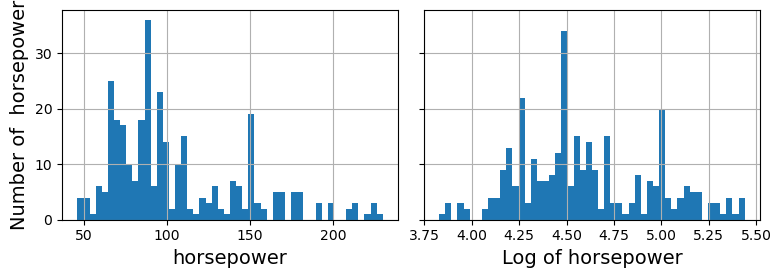

In [128]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
cars["horsepower"].hist(ax=axs[0], bins=50)
cars["horsepower"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("horsepower")
axs[1].set_xlabel("Log of horsepower")
axs[0].set_ylabel("Number of  horsepower")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

In [129]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(cars[["model year"]], [[35]], gamma=0.1)

In [130]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(cars_labels.to_frame())

model = LinearRegression()
model.fit(cars_option3[["horsepower"]], scaled_labels)
some_new_data = cars_option3[["horsepower"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [131]:
predictions

array([[12.01323777],
       [28.15065621],
       [20.92724034],
       [19.85141245],
       [26.15269012]])

In [132]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(cars_option3[["horsepower"]], cars_labels)
predictions = model.predict(some_new_data)

In [133]:
predictions

array([12.01323777, 28.15065621, 20.92724034, 19.85141245, 26.15269012])

## Custom Transformers

To create simple transformers:

In [134]:
cars = cars_option3

In [135]:
cars.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
124,8,350.0,180.0,3664,11.0,73,1,oldsmobile
118,4,116.0,75.0,2158,15.5,73,2,opel
123,6,156.0,122.0,2807,13.5,73,3,toyota
286,8,302.0,129.0,3725,13.4,79,1,ford
314,4,140.0,88.0,2870,18.1,80,1,ford


In [136]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(cars[["weight"]])

In [137]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(cars[["model year"]])

In [138]:
age_simil_35

array([[1.94033543e-63],
       [1.94033543e-63],
       [1.94033543e-63],
       [8.32891258e-85],
       [1.13597144e-88],
       [8.32891258e-85],
       [1.94033543e-63],
       [8.32891258e-85],
       [6.29398882e-54],
       [1.94033543e-63],
       [5.19320116e-57],
       [1.13597144e-88],
       [8.32891258e-85],
       [9.88775261e-74],
       [2.45727291e-77],
       [3.25748853e-70],
       [1.26849170e-92],
       [5.19320116e-57],
       [1.15970879e-96],
       [1.15970879e-96],
       [9.88775261e-74],
       [4.99977311e-81],
       [1.94033543e-63],
       [6.29398882e-54],
       [6.29398882e-54],
       [8.78636625e-67],
       [3.50820875e-60],
       [2.45727291e-77],
       [3.50820875e-60],
       [6.29398882e-54],
       [8.32891258e-85],
       [9.88775261e-74],
       [1.15970879e-96],
       [2.45727291e-77],
       [1.15970879e-96],
       [1.94033543e-63],
       [1.15970879e-96],
       [2.45727291e-77],
       [6.29398882e-54],
       [1.13597144e-88],


In [139]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(cars[["horsepower", "displacement"]])

In [140]:
sf_simil

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [141]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [143]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

**Warning**:
* There was a change in Scikit-Learn 1.3.0 which affected the random number generator for `KMeans` initialization. Therefore the results will be different than in the book if you use Scikit-Learn ≥ 1.3. That's not a problem as long as you don't expect the outputs to be perfectly identical.
* Throughout this notebook, when `n_init` was not set when creating a `KMeans` estimator, I explicitly set it to `n_init=10` to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

In [144]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(cars[["horsepower", "displacement"]],
                                           sample_weight=cars_labels)

In [145]:
similarities[:3].round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [146]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [147]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [148]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [149]:
cars_num_prepared = num_pipeline.fit_transform(cars_num)
cars_num_prepared[:2].round(2)

array([[ 1.45,  1.43,  1.85,  0.77, -1.59, -0.8 , -0.72],
       [-0.87, -0.76, -0.77, -0.98,  0.01, -0.8 ,  0.53]])

In [150]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [151]:
df_cars_num_prepared = pd.DataFrame(
    cars_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=cars_num.index)

In [152]:
df_cars_num_prepared.head(2)  # extra code

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
124,1.448614,1.427732,1.85207,0.773438,-1.585295,-0.804117,-0.719042
118,-0.866257,-0.755701,-0.77241,-0.976275,0.006117,-0.804117,0.530441


In [153]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [154]:
num_pipeline[1]

StandardScaler()

In [155]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [156]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [157]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [158]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 124 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    318 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   car name      318 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 22.4+ KB


In [159]:
from sklearn.compose import ColumnTransformer

num_attribs = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin" ]
cat_attribs = ["car name"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [160]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [161]:
cars_prepared = preprocessing.fit_transform(cars)

In [162]:
cars.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
124,8,350.0,180.0,3664,11.0,73,1,oldsmobile
118,4,116.0,75.0,2158,15.5,73,2,opel
123,6,156.0,122.0,2807,13.5,73,3,toyota
286,8,302.0,129.0,3725,13.4,79,1,ford
314,4,140.0,88.0,2870,18.1,80,1,ford


In [163]:


# Function to calculate column ratio
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Function to get the ratio feature name
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

# Pipeline to calculate column ratio
ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, feature_names_out=ratio_name),
    StandardScaler()
)

# Log pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler())

# Preprocessing pipeline
preprocessing = ColumnTransformer([
    ("weight_per_displacement", ratio_pipeline, ["weight", "displacement"]),  # Displacement per cylinder of the engine
    ("horsepower_per_displacement", ratio_pipeline, ["horsepower", "displacement"]),  # Horsepower per cylinder of the engine
    ("weight_per_cylinder", ratio_pipeline, ["weight", "cylinders"]),  # Weight per cylinder of the engine
    ("displacement_per_cylinder", ratio_pipeline, ["displacement", "cylinders"]),  # Displacement per cylinder of the engine
    ("horsepower_per_cylinder", ratio_pipeline, ["horsepower", "cylinders"]),  # Horsepower per cylinder of the engine
    ("log", log_pipeline, ["weight", "displacement", "horsepower", "cylinders", "model year"]),
    ("acceleration", SimpleImputer(strategy="median"), ["acceleration"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),


    
],
remainder="passthrough"
)





In [164]:
cars_prepared = preprocessing.fit_transform(cars)
cars_prepared.shape

(318, 49)

In [165]:
preprocessing.get_feature_names_out()

array(['weight_per_displacement__ratio',
       'horsepower_per_displacement__ratio', 'weight_per_cylinder__ratio',
       'displacement_per_cylinder__ratio',
       'horsepower_per_cylinder__ratio', 'log__weight',
       'log__displacement', 'log__horsepower', 'log__cylinders',
       'log__model year', 'acceleration__acceleration',
       'cat__car name_amc', 'cat__car name_audi', 'cat__car name_bmw',
       'cat__car name_buick', 'cat__car name_cadillac',
       'cat__car name_capri', 'cat__car name_chevroelt',
       'cat__car name_chevrolet', 'cat__car name_chevy',
       'cat__car name_chrysler', 'cat__car name_datsun',
       'cat__car name_dodge', 'cat__car name_fiat', 'cat__car name_ford',
       'cat__car name_hi', 'cat__car name_honda', 'cat__car name_maxda',
       'cat__car name_mazda', 'cat__car name_mercedes',
       'cat__car name_mercedes-benz', 'cat__car name_mercury',
       'cat__car name_nissan', 'cat__car name_oldsmobile',
       'cat__car name_opel', 'cat__car na

# Select and Train a Model

## Training and Evaluating on the Training Set

In [167]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(cars, cars_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('weight_per_displacement',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1661ca9d0>,
                                                                                       func=<function column_ratio at 0x1661ca790>)),
                                                                  ('standardscaler',
                                                                   Standar...
                                                   'horsepower', 'cylinders',
                                                   'model year']),
                                                 ('acceleration',
                                                  SimpleImputer(strategy='median'),
                                                  ['acceleration']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16542e9a0>)])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [174]:
cars_predictions = lin_reg.predict(cars)
cars_predictions[:10].round(-1)  # -2 = rounded to the nearest hundred

array([20., 30., 20., 20., 20., 20., 20., 30., 20., 30.])

Compare against the actual values:

In [171]:
cars_labels.iloc[:5].values

array([11. , 24. , 20. , 17.6, 26.4])

In [176]:
# extra code – computes the error ratios discussed in the book
error_ratios = cars_predictions[:5].round(-1) / cars_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

81.8%, 25.0%, 0.0%, 13.6%, -24.2%


In [177]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(cars_labels, cars_predictions,
                              squared=False)
lin_rmse

/Users/simonbeckmann/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(2.5634454208793676)

In [179]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(cars, cars_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('weight_per_displacement',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1661ca9d0>,
                                                                                       func=<function column_ratio at 0x1661ca790>)),
                                                                  ('standardscaler',
                                                                   Standar...
                                                 ('acceleration',
                                                  SimpleImputer(strategy='median'),
                                                  ['acceleration']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16542e9a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [180]:
cars_predictions = tree_reg.predict(cars)
tree_rmse = mean_squared_error(cars_labels, cars_predictions,
                              squared=False)
tree_rmse

/Users/simonbeckmann/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.0)

## Better Evaluation Using Cross-Validation

In [181]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, cars, cars_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [182]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      3.863848
std       0.936306
min       2.761397
25%       3.350010
50%       3.471498
75%       4.204083
max       5.619752
dtype: float64

In [183]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, cars, cars_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      3.136728
std       0.490783
min       2.489994
25%       2.820927
50%       3.073910
75%       3.256680
max       3.997013
dtype: float64

**Warning:** the following cell may take a few minutes to run:

In [184]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, cars, cars_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [185]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      2.790198
std       0.756200
min       1.927969
25%       2.426896
50%       2.593615
75%       3.120329
max       4.401617
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [187]:
forest_reg.fit(cars, cars_labels)
cars_predictions = forest_reg.predict(cars)
forest_rmse = mean_squared_error(cars_labels, cars_predictions,
                                 squared=False)
forest_rmse

/Users/simonbeckmann/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(1.0643518327599064)

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [ ]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

## Randomized Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

In [ ]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

**Bonus section: how to choose the sampling distribution for a hyperparameter**

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.


Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for `randint()`, `uniform()`, `geom()` and `expon()`:

In [ ]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for `expon()` and `loguniform()` (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter _scales_. You can see that `expon()` favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But `loguniform()` does not favor any scale, they are all equally likely:

In [ ]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## Analyze the Best Models and Their Errors

In [ ]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

## Evaluate Your System on the Test Set

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [ ]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

## Model persistence using joblib

Save the final model:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

You could use pickle instead, but joblib is more efficient.

# Exercise solutions

## 1.

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

We used the `loguniform()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

## 3.

Exercise: _Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

## 4.

Exercise: _Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

And what does its output feature name look like?

In [ ]:
knn_transformer.get_feature_names_out()

Okay, now let's include this transformer in our preprocessing pipeline:

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the `KNeighborsRegressor`'s hyperparameters? That's what the next exercise is about.

## 5.

Exercise: _Automatically explore some preparation options using `RandomSearchCV`._

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": loguniform(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

Oh well... at least we tried! It looks like the cluster similarity features are definitely better than the KNN feature. But perhaps you could try having both? And maybe training on the full training set would help as well.

## 6.

Exercise: _Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object)
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Let's test our custom transformer:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator
 
check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure the transformation works as expected:

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting `with_mean=False`?

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

How about the feature names out?

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?

In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)